# Programming Assignment # 4 Clustering

## Student Details

Student Full Name:Kundana Vaka

ID: 1001827398


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [4]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

/Users/vishnukundana/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


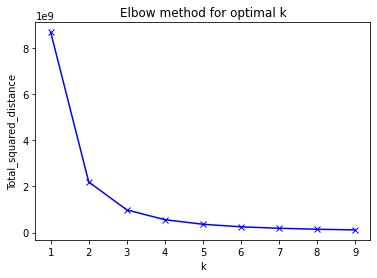

From the line graph the best k is 3. Because it is the optimal number of clusters with minimal sum of squared error.


In [8]:
########################begin code for Task 1-a
# Reading Dataset into pandas dataframe
file = 'clusteringdata.csv'
df = pd.read_csv(file, sep=',\s+', delimiter=',', encoding="latin1")
#Preprocessing
df = df[(df != '?').all(axis=1)]
df.head()
#Convert lable to numeric
lable = preprocessing.LabelEncoder()
df = df.apply(lable.fit_transform)
df.head()
# Elbow method - Plotting a line chart of SSE for each value of k
Total_squared_distance = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df.drop('Class', axis=1))
    Total_squared_distance.append(km.inertia_)
plt.plot(K, Total_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Total_squared_distance')
plt.title('Elbow method for optimal k')
plt.show()
print("From the line graph the best k is 3. Because it is the optimal number of clusters with minimal sum of squared error.")


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [7]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!

X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

###################end code for Task 1-b-1

Color yellow represents Class 1
Color Purple represents Class 0


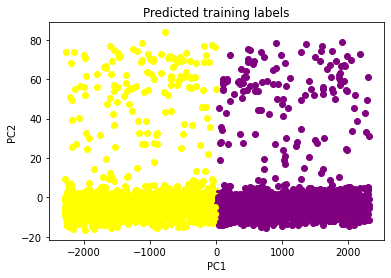

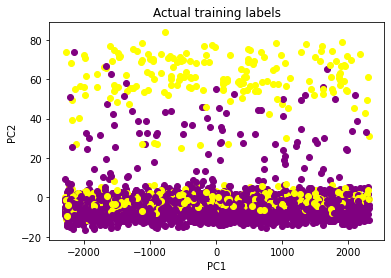

In [9]:

##################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
K_train = KMeans(n_clusters=2,random_state=0)

# Compute cluster centers and predict cluster index for each sample 
K_train_fit = K_train.fit(X_train)
predict_labels = K_train_fit.predict(X_train)
centers = K_train_fit.cluster_centers_

# Model and fit the data to the PCA model
X_train_pca = None
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
print("Color yellow represents Class 1")
print("Color Purple represents Class 0")

#Plotting for predicted values
for i in range(0, len(predict_labels)):
    if predict_labels[i] == 0:
        c = 'purple'
    else:
        c = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()

#Plotting for actual values
for i in range(0, len(x)):
    if Y_train.reset_index().Class[i] == 0:
        c = 'purple'
    else:
        c = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()


####################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

Color yellow represents Class 1
Color Purple represents Class 0


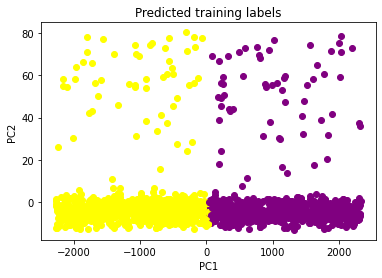

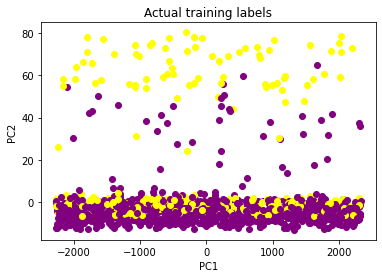

In [10]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)
predict_labels = K_train_fit.predict(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

print("Color yellow represents Class 1")
print("Color Purple represents Class 0")

#Plotting for predicted values
for i in range(0, len(predict_labels)):
    if predict_labels[i] == 0:
        c = 'purple'
    else:
        c = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()

#Plotting for actual values
for i in range(0, len(x)):
    if Y_test.reset_index().Class[i] == 0:
        c = 'purple'
    else:
        c = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [11]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print(confusion_matrix(Y_test, predict_labels))

###################end code for Task 1-b-4

[[564 565]
 [175 196]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [13]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

data = {}
## Calculate pairwise distance matrix for X_train
pdm_train = None
pdm_train_euclidean = pairwise_distances(X_train, metric='euclidean')
pdm_train_cosine = pairwise_distances(X_train, metric='cosine')
pdm_train_manhattan = pairwise_distances(X_train, metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
complete_cosine = AgglomerativeClustering(n_clusters = 2,affinity='cosine',linkage='complete').fit_predict(pdm_train_cosine)
f1_complete_cosine = f1_score(Y_train,complete_cosine)
data.update( {f1_complete_cosine:'complete_cosine'} )

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='complete').fit_predict(pdm_train_euclidean)
f1_complete_euclidean = f1_score(Y_train,complete_euclidean)
data.update( {f1_complete_euclidean:'complete_euclidean'} )


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='complete').fit_predict(pdm_train_manhattan)
f1_complete_manhattan = f1_score(Y_train,complete_manhattan)
data.update( {f1_complete_manhattan:'complete_manhattan'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine

average_cosine = AgglomerativeClustering(n_clusters = 2, affinity='cosine',linkage='average').fit_predict(pdm_train_cosine)
f1_average_cosine = f1_score(Y_train,average_cosine)
data.update( {f1_average_cosine:'average_cosine'} )



## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='average').fit_predict(pdm_train_euclidean)
f1_average_euclidean = f1_score(Y_train,average_euclidean)
data.update( {f1_average_euclidean:'average_euclidean'} )



## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
              
average_manhattan = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='average').fit_predict(pdm_train_manhattan)
f1_average_manhattan = f1_score(Y_train,average_manhattan)
data.update( {f1_average_manhattan:'average_manhattan'} )

print("F1-score for complete linkage + cosine", f1_complete_cosine)
print("F1-score for complete linkage + euclidean",f1_complete_euclidean)
print("F1-score for complete linkage + manhattan",f1_complete_manhattan )
print("F1-score for average linkage + cosine",f1_average_cosine )
print("F1-score for average linkage + euclidean",f1_average_euclidean )
print("F1-score for average linkage + manhattan",f1_average_manhattan )

max_value = max(f1_complete_cosine,f1_complete_euclidean,f1_complete_manhattan,f1_average_cosine,f1_average_euclidean,f1_average_manhattan)
print("the best pair of linkage method and similarity measure :", max_value, " is ", data.get(max_value))

###################end code for Task 2-a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow obse

F1-score for complete linkage + cosine 0.38778917243024086
F1-score for complete linkage + euclidean 0.2687265917602996
F1-score for complete linkage + manhattan 0.3410975128306356
F1-score for average linkage + cosine 0.38714319980810746
F1-score for average linkage + euclidean 0.29985721085197525
F1-score for average linkage + manhattan 0.27251516565562295
the best pair of linkage method and similarity measure : 0.38778917243024086  is  complete_cosine


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

complete
Color yellow represents Class 1
Color Purple represents Class 0


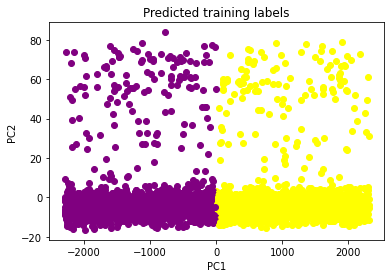

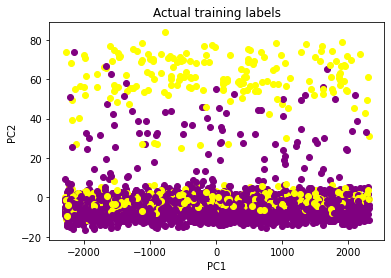

In [15]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

st = data.get(max_value).split("_")
print(st[0])

# Visualize the predicted training labels versus actual training labels. 

best_Agg_Clustering = AgglomerativeClustering(n_clusters=2, affinity=st[1], linkage=st[0])  
X_best_pca = best_Agg_Clustering.fit_predict(X_train_pca)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Color yellow represents Class 1")
print("Color Purple represents Class 0")

#plot for predicted values 
for i in range(1, len(X_best_pca)):
    if X_best_pca[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()

#plot for actual values
for i in range(0, len(x)):
    if Y_train.reset_index().Class[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()



###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


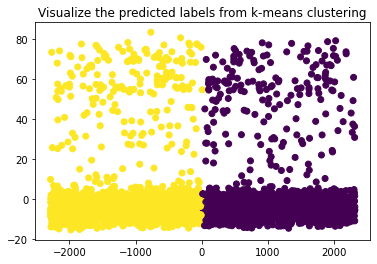

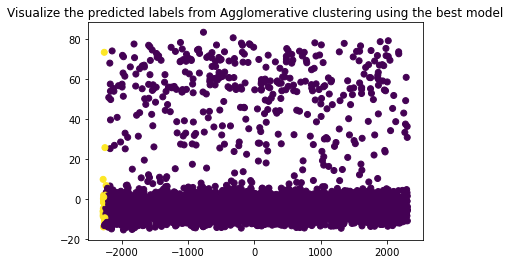

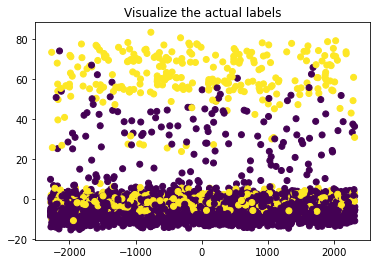

In [17]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
dataset_Kmeans = KMeans(n_clusters=2,random_state=0)
datset_fit_Kmeans = dataset_Kmeans.fit_predict(df)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
best_pdm = pairwise_distances(df, metric='cosine')
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglomerativeClustering = AgglomerativeClustering(n_clusters=2)  
agglomerativeClustering_fitPredict = agglomerativeClustering.fit_predict(best_pdm)



### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(df)

# Visualize the predicted Kmeans labels versus the predicted Agglomerative labels versus Actual labels. 
#KMeans
x = X_pca[:,0]
y3 = X_pca[:,1]
plt.scatter(x,y3,c=datset_fit_Kmeans)
plt.title("Visualize the predicted labels from k-means clustering")
plt.show() 

#Agglomorative 
x = X_pca[:,0]
y2 = X_pca[:,1]
plt.scatter(x,y2,c=agglomerativeClustering_fitPredict)
plt.title("Visualize the predicted labels from Agglomerative clustering using the best model")
plt.show()

#Actual
x = X_pca[:,0]
y1 = X_pca[:,1]
plt.scatter(x,y1,c=Y)
plt.title("Visualize the actual labels")
plt.show()


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [19]:
###################begin code for Task 3-b

K_compare = KMeans(2)
K_fit_predict = K_compare.fit_predict(df)

X_train_best_pca = best_Agg_Clustering.fit_predict(df)

print("confusion_matrix for AgglomerativeClustering")
print(confusion_matrix(Y,X_train_best_pca ))
print("confusion_matrix for kmeans")
print(confusion_matrix(Y,K_fit_predict ))
print("classification_report for AgglomerativeClustering")
print(classification_report(Y, X_train_best_pca))
print("classification_report for kmeans")
print(classification_report(Y, K_fit_predict))
print("Reasoning: The accuracy of kmeans is higher than that of agglomerative and the f-1 score is overall higher than the agglomerative")


###################end code for Task 3-b

confusion_matrix for AgglomerativeClustering
[[  26 3753]
 [  12 1209]]
confusion_matrix for kmeans
[[1912 1867]
 [ 571  650]]
classification_report for AgglomerativeClustering
              precision    recall  f1-score   support

           0       0.68      0.01      0.01      3779
           1       0.24      0.99      0.39      1221

    accuracy                           0.25      5000
   macro avg       0.46      0.50      0.20      5000
weighted avg       0.58      0.25      0.11      5000

classification_report for kmeans
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      3779
           1       0.26      0.53      0.35      1221

    accuracy                           0.51      5000
   macro avg       0.51      0.52      0.48      5000
weighted avg       0.65      0.51      0.55      5000

Reasoning: The accuracy of kmeans is higher than that of agglomerative and the f-1 score is overall higher than the agglomerative


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points